### 1. Portfolio optimization

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  7 of 7 completed


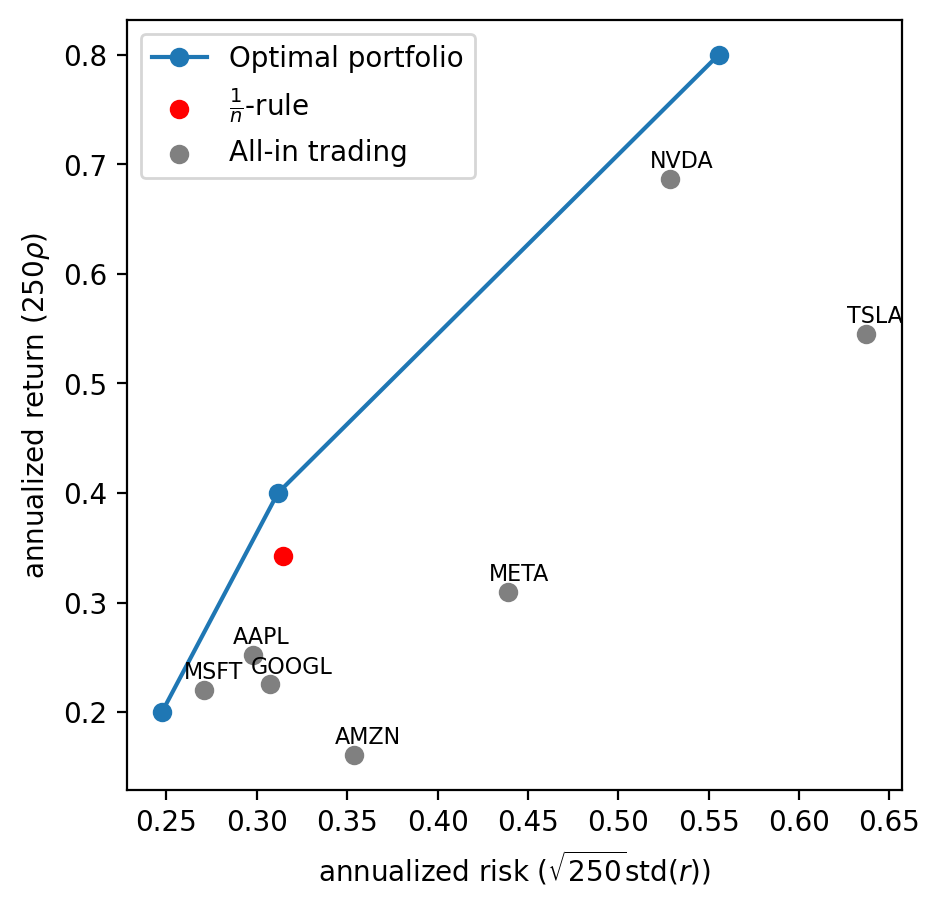

In [1]:
import yfinance as yf
import numpy as np
from numpy.linalg import inv

import matplotlib.pyplot as plt
# Magnificient 7
tickers = ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA']
# Download the 7 stocks data (closing market price)
data = yf.download(tickers, start='2020-05-05', end='2025-05-05')['Close']
# per-period return matrix
returns = data.pct_change().dropna()
# convert into numpy array
R = returns.values
# annualized target returns
# (20%,40%,80%)
rhos = [0.0008, 0.0016, 0.0032]
# matrix preparation
T, n = R.shape
ones_T = np.ones((T, 1))
ones_n = np.ones((n, 1))
M = np.block([
        [2*R.T@R, R.T@ones_T, ones_n],
        [ones_T.T@R, 0, 0],
        [ones_n.T, 0, 0]
    ])

# optimal portfolio
risks_opt = []
returns_opt = []
for i, rho in enumerate(rhos):
    v = np.vstack([
        2*rho*R.T@ones_T,
        [[T*rho]],
        [[1]]
    ])
    # solve the KKT equation
    wstar_z = np.dot(inv(M),v)
    wstar = wstar_z[:n]
    r = R@wstar
    # compute the optimal return-risk pair
    returns_opt.append(250*rho)
    risks_opt.append(np.sqrt(250)*np.std(r))
    
# naive 1/n rule
w_naive = np.ones((n,1))/n
r_naive = R@w_naive
return_naive = 250*np.mean(r_naive)
risk_naive = np.sqrt(250)*np.std(r_naive)

# all-in trading
return_all = []
risk_all = []
for i in range(n):
    w_single = np.zeros(n)
    w_single[i] = 1
    r = R@w_single
    return_all.append(250*np.mean(r))
    risk_all.append(np.sqrt(250)*np.std(r))

# plot the tradeoff performance
plt.figure(figsize=(5,5),dpi=200)
plt.plot(risks_opt,returns_opt, label=r"Optimal portfolio", marker='o')
plt.scatter(risk_naive,return_naive,color='red', label=r"$\frac{1}{n}$-rule")
plt.scatter(risk_all,return_all,color='grey', label='All-in trading',)
for i in range(n):
    plt.annotate(tickers[i],(risk_all[i],return_all[i]),
        textcoords="offset points", xytext=(-7,4), fontsize=8)
plt.xlabel(r"annualized risk ($\sqrt{250} {\sf std}(r)$)")
plt.ylabel(r"annualized return ($250\rho$)")
plt.legend()
plt.show()

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  7 of 7 completed


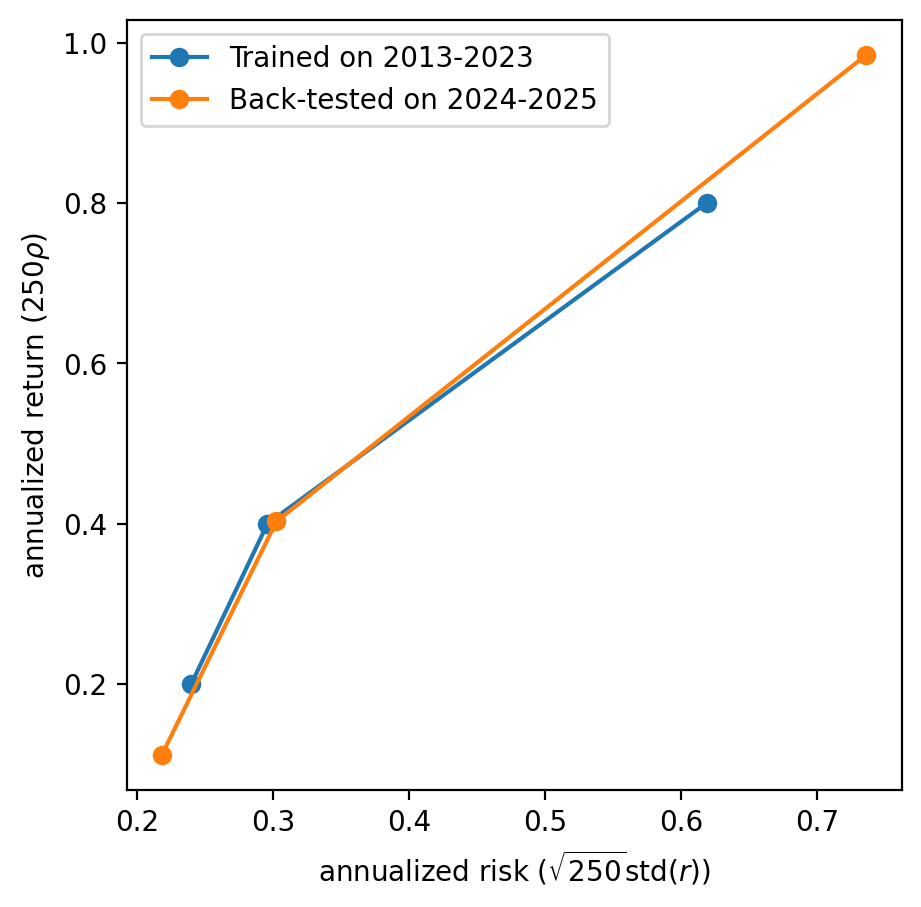

In [2]:
import yfinance as yf
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Magnificient 7
tickers = ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA']
n = len(tickers)

# training data (2013-05-05 to 2023-05-04)
data_train=yf.download(tickers,start='2013-05-05', end='2023-05-04')['Close']
returns_train = data_train.pct_change().dropna()
R_train = returns_train.values
T_train = R_train.shape[0]

# back-testing data (2023-05-05 to 2025-05-05)
data_test=yf.download(tickers,start='2023-05-05', end='2025-05-05')['Close']
returns_test = data_test.pct_change().dropna()
R_test = returns_test.values
T_test = R_test.shape[0]

# annualized target returns (20%,40%,80%)
rhos = [0.0008, 0.0016, 0.0032]

# matrix preparation
ones_T = np.ones((T_train, 1))
ones_n = np.ones((n, 1))
M = np.block([
        [2*R_train.T@R_train, R_train.T@ones_T, ones_n],
        [ones_T.T@R_train, 0, 0],
        [ones_n.T, 0, 0]
    ])

risks_train = []
returns_train = []
risks_test = []
returns_test = []
for i, rho in enumerate(rhos):
    v = np.vstack([
        2*rho*R_train.T@ones_T,
        [[T_train*rho]],
        [[1]]
    ])
    # solve the KKT equation
    wstar_z = np.dot(inv(M),v)
    wstar = wstar_z[:n]
    # compute the optimal return-risk pair
    r = R_train@wstar
    returns_train.append(250*rho)
    risks_train.append(np.sqrt(250)*np.std(r))
    # apply w* to test data
    r_test = R_test@wstar
    returns_test.append(250*np.mean(r_test))
    risks_test.append(np.sqrt(250)*np.std(r_test))

# plot the tradeoff performance
plt.figure(figsize=(5,5),dpi=200)
plt.plot(risks_train,returns_train,label=r"Trained on 2013-2023",marker='o')
plt.plot(risks_test,returns_test,label=r"Back-tested on 2024-2025",marker='o')
plt.xlabel(r"annualized risk ($\sqrt{250} {\sf std}(r)$)")
plt.ylabel(r"annualized return ($250\rho$)")
plt.legend()
plt.show()

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  7 of 7 completed


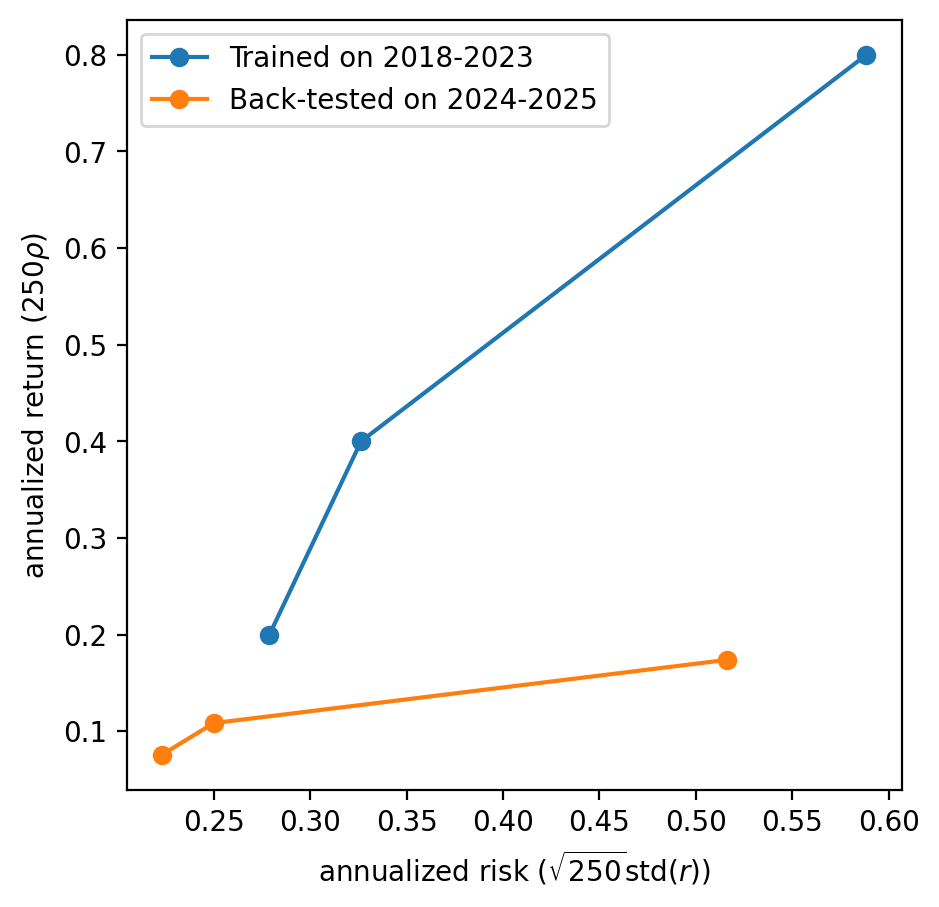

In [3]:
import yfinance as yf
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Magnificient 7
tickers = ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA']
n = len(tickers)

# training data (2013-05-05 to 2023-05-04)
data_train=yf.download(tickers,start='2018-05-05', end='2023-05-04')['Close']
returns_train = data_train.pct_change().dropna()
R_train = returns_train.values
T_train = R_train.shape[0]

# back-testing data (2023-05-05 to 2025-05-05)
data_test=yf.download(tickers,start='2023-05-05', end='2025-05-05')['Close']
returns_test = data_test.pct_change().dropna()
R_test = returns_test.values
T_test = R_test.shape[0]

# annualized target returns (20%,40%,80%)
rhos = [0.0008, 0.0016, 0.0032]

# matrix preparation
ones_T = np.ones((T_train, 1))
ones_n = np.ones((n, 1))
M = np.block([
        [2*R_train.T@R_train, R_train.T@ones_T, ones_n],
        [ones_T.T@R_train, 0, 0],
        [ones_n.T, 0, 0]
    ])

risks_train = []
returns_train = []
risks_test = []
returns_test = []
for i, rho in enumerate(rhos):
    v = np.vstack([
        2*rho*R_train.T@ones_T,
        [[T_train*rho]],
        [[1]]
    ])
    # solve the KKT equation
    wstar_z = np.dot(inv(M),v)
    wstar = wstar_z[:n]
    # compute the optimal return-risk pair
    r = R_train@wstar
    returns_train.append(250*rho)
    risks_train.append(np.sqrt(250)*np.std(r))
    # apply w* to test data
    r_test = R_test@wstar
    returns_test.append(250*np.mean(r_test))
    risks_test.append(np.sqrt(250)*np.std(r_test))

# plot the tradeoff performance
plt.figure(figsize=(5,5),dpi=200)
plt.plot(risks_train,returns_train,label=r"Trained on 2018-2023",marker='o')
plt.plot(risks_test,returns_test,label=r"Back-tested on 2024-2025",marker='o')
plt.xlabel(r"annualized risk ($\sqrt{250} {\sf std}(r)$)")
plt.ylabel(r"annualized return ($250\rho$)")
plt.legend()
plt.show()

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  7 of 7 completed


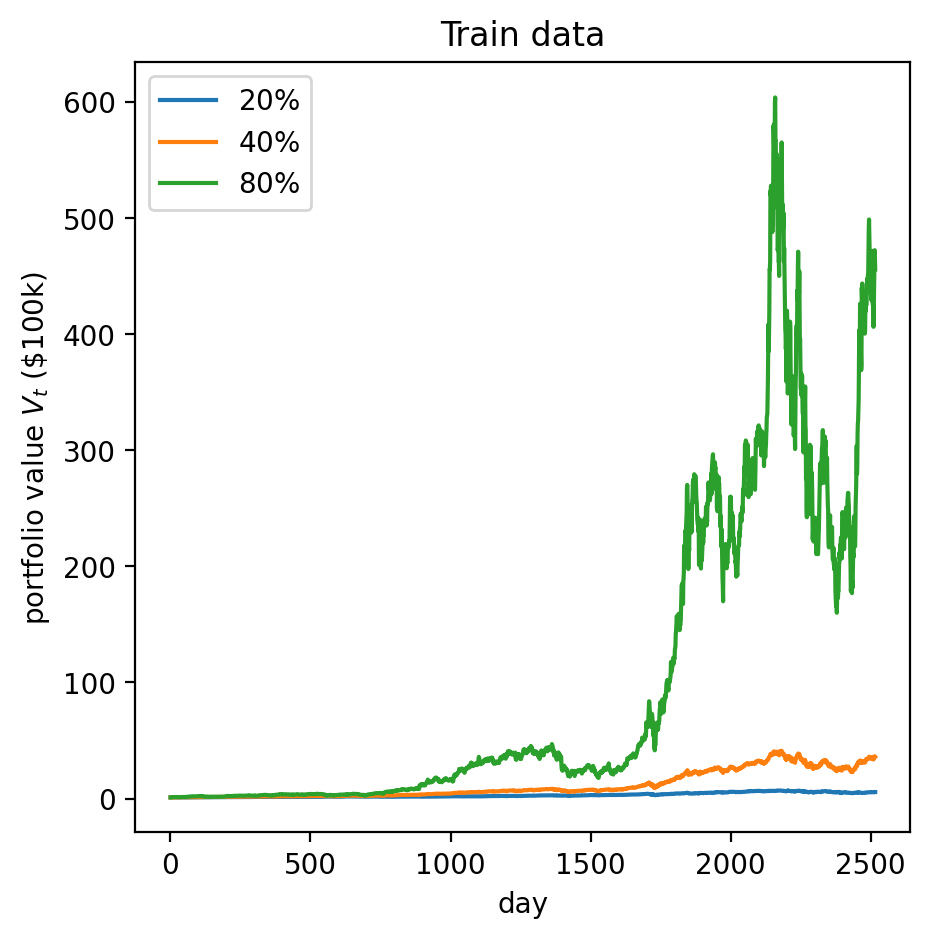

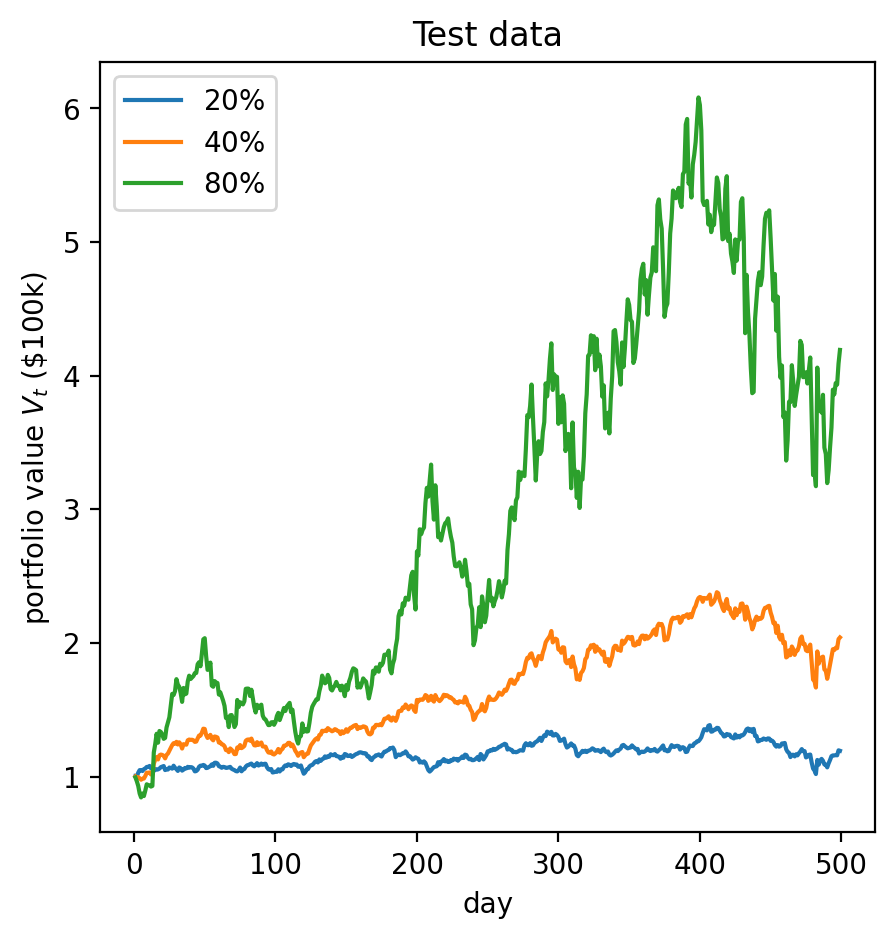

In [4]:
import numpy as np
from numpy.linalg import inv
import yfinance as yf
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Magnificent 7 tickers
tickers = ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA']
n = len(tickers)

# training data (2013-05-05 to 2023-05-04)
data_train=yf.download(tickers,start='2013-05-05', end='2023-05-04')['Close']
returns_train = data_train.pct_change().dropna()
R_train = returns_train.values
T_train = R_train.shape[0]
# back-testing data (2023-05-05 to 2025-05-05)
data_test=yf.download(tickers,start='2023-05-05', end='2025-05-05')['Close']
returns_test = data_test.pct_change().dropna()
R_test = returns_test.values
T_test = R_test.shape[0]

# annualized target returns (20%,40%,80%)
rhos = [0.0008, 0.0016, 0.0032]

# matrix preparation
ones_T = np.ones((T_train, 1))
ones_n = np.ones((n, 1))
M = np.block([
        [2*R_train.T@R_train, R_train.T@ones_T, ones_n],
        [ones_T.T@R_train, 0, 0],
        [ones_n.T, 0, 0]
    ])

V_train = []
V_test = []
for i, rho in enumerate(rhos):
    v = np.vstack([
        2*rho*R_train.T@ones_T,
        [[T_train*rho]],
        [[1]]
    ])
    # solve the KKT equation
    wstar_z = np.dot(inv(M),v)
    wstar = wstar_z[:n]
    r = R_train@wstar
    V_train.append(np.cumprod(1+r))
    # apply w* to test data
    r_test = R_test@wstar
    V_test.append(np.cumprod(1+r_test))

plt.figure(figsize=(5,5),dpi=200)
for i, rho in enumerate(rhos):
    plt.plot(np.arange(1, T_train+1),V_train[i],label=f"${250*rho*100:.0f}\\%$")
plt.xlabel(r'day')
plt.ylabel(r'portfolio value $V_t$ (\$100k)')
plt.title('Train data')
plt.legend()
plt.show()

plt.figure(figsize=(5,5),dpi=200)
for i, rho in enumerate(rhos):
    plt.plot(np.arange(1, T_test+1),V_test[i],label=f"${250*rho*100:.0f}\\%$")
plt.xlabel(r'day')
plt.ylabel(r'portfolio value $V_t$ (\$100k)')
plt.title('Test data')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from numpy.linalg import inv
import yfinance as yf
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Magnificent 7 tickers
tickers = ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA']
n = len(tickers)

# training data (2013-05-05 to 2023-05-04)
data_train=yf.download(tickers,start='2018-05-05', end='2023-05-04')['Close']
returns_train = data_train.pct_change().dropna()
R_train = returns_train.values
T_train = R_train.shape[0]
# back-testing data (2023-05-05 to 2025-05-05)
data_test=yf.download(tickers,start='2023-05-05', end='2025-05-05')['Close']
returns_test = data_test.pct_change().dropna()
R_test = returns_test.values
T_test = R_test.shape[0]

# annualized target returns (20%,40%,80%)
rhos = [0.0008, 0.0016, 0.0032]

# matrix preparation
ones_T = np.ones((T_train, 1))
ones_n = np.ones((n, 1))
M = np.block([
        [2*R_train.T@R_train, R_train.T@ones_T, ones_n],
        [ones_T.T@R_train, 0, 0],
        [ones_n.T, 0, 0]
    ])

V_train = []
V_test = []
for i, rho in enumerate(rhos):
    v = np.vstack([
        2*rho*R_train.T@ones_T,
        [[T_train*rho]],
        [[1]]
    ])
    # solve the KKT equation
    wstar_z = np.dot(inv(M),v)
    wstar = wstar_z[:n]
    r = R_train@wstar
    V_train.append(np.cumprod(1+r))
    # apply w* to test data
    r_test = R_test@wstar
    V_test.append(np.cumprod(1+r_test))

plt.figure(figsize=(5,5),dpi=200)
for i, rho in enumerate(rhos):
    plt.plot(np.arange(1, T_train+1),V_train[i],label=f"${250*rho*100:.0f}\\%$")
plt.xlabel(r'day')
plt.ylabel(r'portfolio value $V_t$ (\$100k)')
plt.title('Train data')
plt.legend()
plt.show()

plt.figure(figsize=(5,5),dpi=200)
for i, rho in enumerate(rhos):
    plt.plot(np.arange(1, T_test+1),V_test[i],label=f"${250*rho*100:.0f}\\%$")
plt.xlabel(r'day')
plt.ylabel(r'portfolio value $V_t$ (\$100k)')
plt.title('Test data')
plt.legend()
plt.show()